# -----------------------
# Data Exploration & Visualization.
# -----------------------

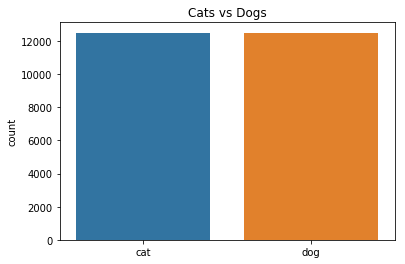

In [1]:
# Category distribution
from pathlib import Path

import os
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

FOLDER_TRN = Path('train/')

fnames = os.listdir(FOLDER_TRN)
labels = []
for fname in fnames:
    labels.append(fname.split('.')[0])

sns.countplot(labels)
plt.title('Cats vs Dogs');

In [11]:
# Check mean aspect ratio (width/height), mean width and mean height
from keras.preprocessing import image

import numpy as np


imgs_width = [image.load_img(FOLDER_TRN / name).width for name in fnames]
imgs_height = [image.load_img(FOLDER_TRN / name).height for name in fnames]
aspect_ratio = np.array(imgs_width).astype(np.float64) / np.array(imgs_height).astype(np.float64)

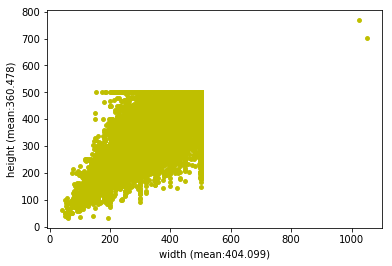

In [65]:
# Scatter diagram of images width&height
plt.scatter(imgs_width, imgs_height, c='y', s=15);
plt.xlabel('width (mean:{:.3f})'.format(np.mean(imgs_width)))
plt.ylabel('height (mean:{:.3f})'.format(np.mean(imgs_height)));

In [67]:
# Statistical feature for image width&height 
import pandas as pd


df_img_size = pd.DataFrame({
    'width': imgs_width,
    'height': imgs_height
})
df_img_size.describe()

width        height
count  25000.00000  25000.000000
mean     404.09904    360.478080
std      109.03793     97.019959
min       42.00000     32.000000
25%      323.00000    301.000000
50%      447.00000    374.000000
75%      499.00000    421.000000
max     1050.00000    768.000000

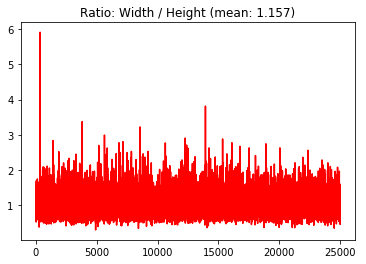

In [39]:
# Plotting aspect ratio
plt.plot(aspect_ratio, c='r')
plt.title('Ratio: Width / Height (mean: {:.3f})'.format(aspect_ratio.mean()));

In [87]:
# Aspect ratio vary so much is not good, let's record these files for the moment
from pprint import pprint


# upper&lower quartiles
quartile_ratio = np.percentile(aspect_ratio, [25, 75])
print('Quartile for aspect ratio, upper: {:.3f}; lower: {:.3f}'.format(quartile_ratio[0], quartile_ratio[1]))
vary = [fnames[i] for i, ratio in enumerate(aspect_ratio) if ratio < quartile_ratio[0] / 2 or ratio > quartile_ratio[1] * 2]
print('There are {} files have unusual aspect ratio:\n'.format(len(vary)))
pprint(vary)

Quartile for aspect ratio, upper: 0.930; lower: 1.337
There are 58 files have unusual aspect ratio:

['cat.10119.jpg',
 'dog.4367.jpg',
 'cat.3324.jpg',
 'cat.8902.jpg',
 'cat.9954.jpg',
 'cat.3567.jpg',
 'dog.3330.jpg',
 'cat.5351.jpg',
 'dog.1741.jpg',
 'dog.4113.jpg',
 'dog.10749.jpg',
 'cat.712.jpg',
 'cat.8542.jpg',
 'cat.11349.jpg',
 'dog.3380.jpg',
 'cat.10192.jpg',
 'cat.1723.jpg',
 'cat.11060.jpg',
 'cat.11255.jpg',
 'dog.2478.jpg',
 'dog.9632.jpg',
 'cat.5773.jpg',
 'cat.5929.jpg',
 'dog.7294.jpg',
 'dog.1483.jpg',
 'cat.728.jpg',
 'cat.188.jpg',
 'dog.3135.jpg',
 'cat.12420.jpg',
 'cat.12243.jpg',
 'cat.9552.jpg',
 'dog.3139.jpg',
 'cat.9171.jpg',
 'cat.8755.jpg',
 'dog.2503.jpg',
 'dog.11526.jpg',
 'dog.12331.jpg',
 'cat.6232.jpg',
 'dog.11248.jpg',
 'cat.3370.jpg',
 'dog.8739.jpg',
 'cat.5964.jpg',
 'dog.7857.jpg',
 'cat.9819.jpg',
 'dog.5880.jpg',
 'cat.10988.jpg',
 'dog.10199.jpg',
 'cat.664.jpg',
 'cat.11512.jpg',
 'dog.7019.jpg',
 'dog.1985.jpg',
 'dog.2874.jpg',
 'cat

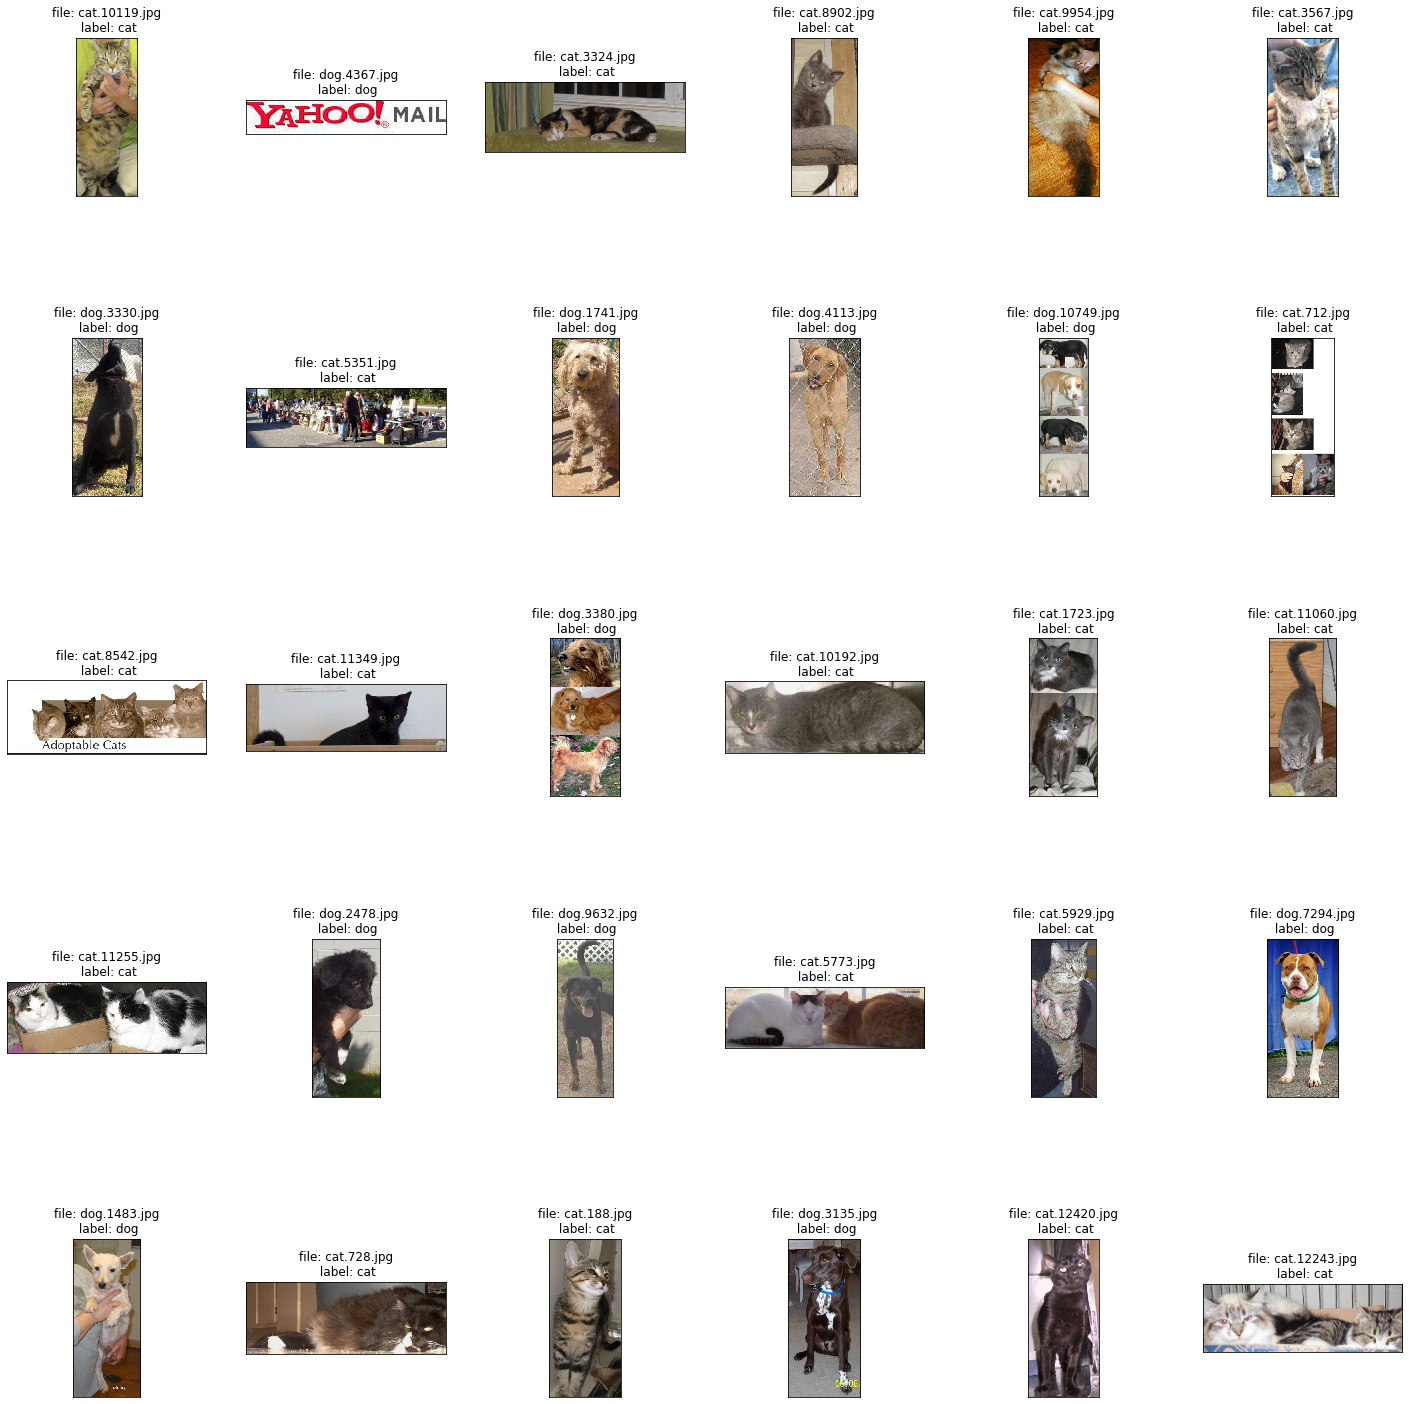

In [88]:
# Lets take a look for part of these images with unusual aspect ratio
# We can see some are horizontally stretched, others are vertically stretched
nrows, ncols = (5, 6)
fig, ax = plt.subplots(nrows, ncols, figsize=(25, 25))
plt.subplots_adjust(hspace=.9)

for num in range(nrows*ncols):
    file_name = vary[num]
    file_path = FOLDER_TRN / file_name
    label = file_name.split('.')[0]
    img = plt.imread(file_path)
    
    ax[num // ncols, num % ncols].imshow(img)
    ax[num // ncols, num % ncols].set_title("file: {}\n label: {}".format(file_name, label), size=12)
    ax[num // ncols, num % ncols].get_xaxis().set_visible(False)
    ax[num // ncols, num % ncols].get_yaxis().set_visible(False)

# -----------------------
# Dogs & Cats Category Codes In ImageNet.
# -----------------------

In [2]:
dogs_code = [
    'n02085620','n02085782','n02085936','n02086079',
    'n02086240','n02086646','n02086910','n02087046',
    'n02087394','n02088094','n02088238','n02088364',
    'n02088466','n02088632','n02089078','n02089867',
    'n02089973','n02090379','n02090622','n02090721',
    'n02091032','n02091134','n02091244','n02091467',
    'n02091635','n02091831','n02092002','n02092339',
    'n02093256','n02093428','n02093647','n02093754',
    'n02093859','n02093991','n02094114','n02094258',
    'n02094433','n02095314','n02095570','n02095889',
    'n02096051','n02096177','n02096294','n02096437',
    'n02096585','n02097047','n02097130','n02097209',
    'n02097298','n02097474','n02097658','n02098105',
    'n02098286','n02098413','n02099267','n02099429',
    'n02099601','n02099712','n02099849','n02100236',
    'n02100583','n02100735','n02100877','n02101006',
    'n02101388','n02101556','n02102040','n02102177',
    'n02102318','n02102480','n02102973','n02104029',
    'n02104365','n02105056','n02105162','n02105251',
    'n02105412','n02105505','n02105641','n02105855',
    'n02106030','n02106166','n02106382','n02106550',
    'n02106662','n02107142','n02107312','n02107574',
    'n02107683','n02107908','n02108000','n02108089',
    'n02108422','n02108551','n02108915','n02109047',
    'n02109525','n02109961','n02110063','n02110185',
    'n02110341','n02110627','n02110806','n02110958',
    'n02111129','n02111277','n02111500','n02111889',
    'n02112018','n02112137','n02112350','n02112706',
    'n02113023','n02113186','n02113624','n02113712',
    'n02113799','n02113978'
]

cats_code = [
    'n02123045','n02123159','n02123394','n02123597',
    'n02124075','n02125311','n02127052'
]

# -----------------------------
# GPU Resources
# -----------------------------

In [3]:
# checkout GPU
!nvidia-smi

Thu Aug 29 01:40:13 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.40.04    Driver Version: 418.40.04    CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           On   | 00000000:00:1E.0 Off |                    0 |
| N/A   45C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

# -----------------------------
# Data Cleaning
# -----------------------------

In [89]:
# Using pretrained models to find out abnormal images
from keras.applications import Xception, xception, InceptionV3, inception_v3, ResNet50, resnet50, InceptionResNetV2, inception_resnet_v2, \
    NASNetLarge, nasnet

import tensorflow as tf
import keras.backend.tensorflow_backend as KTF


KTF.set_session(tf.Session(config=tf.ConfigProto(device_count={'gpu':0})))

CF_FOLDER = Path('cheatfiles/')


def find_out_cheat_files(model, preprocess_func, decode, img_size):
    """
        use pretrained model(on imagenet) to find out images that may confuse my model in later training step.
    """
    
    cheat_files = []
    for fname in fnames:
        category = cats_code if fname.split('.')[0] == 'cat' else dogs_code
        img_path = FOLDER_TRN / fname
        img = image.load_img(img_path, target_size=img_size)
        arr = image.img_to_array(img)
        tensor = np.expand_dims(arr, axis=0)
        tensor = preprocess_func(tensor)
        preds = model.predict(tensor)
        preds_decode, _, __ = zip(*decode(preds, top=30)[0])

        if not np.intersect1d(preds_decode, category).size:
            cheat_files.append(fname)
    
    return cheat_files

In [10]:
# Found out by Xception
cheatfiles_xception = find_out_cheat_files(
    model=Xception(weights='imagenet'),
    preprocess_func=xception.preprocess_input,
    decode=xception.decode_predictions,
    img_size=(299, 299)
)

In [14]:
# Record the identification by Xception
np.savez(CF_FOLDER / 'xception_top30.npz', xception=cheatfiles_xception)

In [5]:
cheatfiles_xception = np.load(CF_FOLDER / 'xception_top30.npz')['xception']

In [6]:
len(cheatfiles_xception)

103

In [16]:
# Found out by inception_v3
cheatfiles_inception_v3 = find_out_cheat_files(
    model=InceptionV3(weights='imagenet'), 
    preprocess_func=inception_v3.preprocess_input, 
    decode=inception_v3.decode_predictions,
    img_size=(299, 299)
)

In [18]:
# Record the identification by InceptionV3
np.savez(CF_FOLDER / 'inception_v3_top30.npz', inception_v3=cheatfiles_inception_v3)

In [6]:
cheatfiles_inception_v3 = np.load(CF_FOLDER / 'inception_v3_top30.npz')['inception_v3']

In [8]:
len(cheatfiles_inception_v3)

147

In [19]:
# Found out by resnet50
cheatfiles_resnet50 = find_out_cheat_files(
    model=ResNet50(weights='imagenet'), 
    preprocess_func=resnet50.preprocess_input, 
    decode=resnet50.decode_predictions, 
    img_size=(224, 224)
)

In [21]:
# Record the identification by ResNet50
np.savez(CF_FOLDER / 'resnet50_top30.npz', resnet50=cheatfiles_resnet50)

In [7]:
cheatfiles_resnet50 = np.load(CF_FOLDER / 'resnet50_top30.npz')['resnet50']

In [10]:
len(cheatfiles_resnet50)

325

In [8]:
# Found out by NASNetMobile
cheatfiles_nasnet = find_out_cheat_files(
    model=NASNetLarge(weights='imagenet'), 
    preprocess_func=nasnet.preprocess_input, 
    decode=nasnet.decode_predictions, 
    img_size=(331, 331)
)

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
# Record the identification by NASNetMobile
np.savez(CF_FOLDER / 'nasnet_top30.npz', nasnet=cheatfiles_nasnet)

In [8]:
cheatfiles_nasnet = np.load(CF_FOLDER / 'nasnet_top30.npz')['nasnet']

In [11]:
len(cheatfiles_nasnet)

96

In [6]:
# Found out by InceptionResNetV2
cheatfiles_inception_resnet_v2 = find_out_cheat_files(
    model=InceptionResNetV2(weights='imagenet'), 
    preprocess_func=inception_resnet_v2.preprocess_input, 
    decode=inception_resnet_v2.decode_predictions, 
    img_size=(299, 299)
)

In [17]:
# Record the identification by InceptionResNet50V2
np.savez(CF_FOLDER / 'inception_resnet_v2_top30.npz', inception_resnet_v2=cheatfiles_inception_resnet_v2)

In [9]:
cheatfiles_inception_resnet_v2 = np.load(CF_FOLDER / 'inception_resnet_v2_top30.npz')['inception_resnet_v2']

In [16]:
len(cheatfiles_inception_resnet_v2)

124

In [10]:
# Aggregate all the files that found out by above pretrained models
from functools import reduce


cheat_files_by_models = reduce(
    np.union1d, 
    (cheatfiles_xception, cheatfiles_inception_v3, cheatfiles_inception_resnet_v2, cheatfiles_resnet50, cheatfiles_nasnet)
)

print("models found out {} cheat files below:".format(len(cheat_files_by_models)))
pprint(cheat_files_by_models)

models found out 416 cheat files below:
array(['cat.10029.jpg', 'cat.10037.jpg', 'cat.10107.jpg', 'cat.10121.jpg',
       'cat.10209.jpg', 'cat.10220.jpg', 'cat.10266.jpg', 'cat.10270.jpg',
       'cat.10365.jpg', 'cat.10425.jpg', 'cat.10471.jpg', 'cat.10521.jpg',
       'cat.10532.jpg', 'cat.10536.jpg', 'cat.10539.jpg', 'cat.10579.jpg',
       'cat.10609.jpg', 'cat.10634.jpg', 'cat.10636.jpg', 'cat.10700.jpg',
       'cat.10712.jpg', 'cat.10743.jpg', 'cat.10807.jpg', 'cat.10863.jpg',
       'cat.10864.jpg', 'cat.10893.jpg', 'cat.10912.jpg', 'cat.10932.jpg',
       'cat.10946.jpg', 'cat.11018.jpg', 'cat.11039.jpg', 'cat.11062.jpg',
       'cat.11141.jpg', 'cat.11168.jpg', 'cat.11184.jpg', 'cat.11222.jpg',
       'cat.11231.jpg', 'cat.11255.jpg', 'cat.11256.jpg', 'cat.11281.jpg',
       'cat.11297.jpg', 'cat.1139.jpg', 'cat.11399.jpg', 'cat.114.jpg',
       'cat.11432.jpg', 'cat.11544.jpg', 'cat.11562.jpg', 'cat.11565.jpg',
       'cat.11607.jpg', 'cat.11608.jpg', 'cat.11634.jpg', 'cat.

In [11]:
# Record the identification by all models
np.savez(CF_FOLDER / 'models_all_top30.npz', all=cheat_files_by_models)

In [90]:
cheat_files_by_models = np.load(CF_FOLDER / 'models_all_top30.npz')['all']

In [91]:
# Abnormal images listed on kaggle discussion forum
import pandas as pd

from pprint import pprint

# The following files listed on discussion forum for reference
df_cheat = pd.read_csv('cheat.csv')
arr_cheat = df_cheat['filename'].values
arr_cheat = [name + '.jpg' for name in arr_cheat if not name.endswith('.jpg')]
print("furthermore, there are {} cheat files collected by discussion forum:".format(len(arr_cheat)))
pprint(arr_cheat)

furthermore, there are 49 cheat files collected by discussion forum:
['dog.11731.jpg',
 'dog.4334.jpg',
 'cat.4688.jpg',
 'cat.11222.jpg',
 'cat.1450.jpg',
 'cat.2159.jpg',
 'cat.3822.jpg',
 'cat.4104.jpg',
 'cat.5355.jpg',
 'cat.7194.jpg',
 'cat.7920.jpg',
 'cat.9250.jpg',
 'cat.9444.jpg',
 'cat.9882.jpg',
 'dog.11538.jpg',
 'dog.11724.jpg',
 'dog.8507.jpg',
 'cat.2939.jpg',
 'cat.3216.jpg',
 'cat.4833.jpg',
 'cat.7968.jpg',
 'cat.8470.jpg',
 'dog.10161.jpg',
 'dog.10190.jpg',
 'dog.11186.jpg',
 'dog.1308.jpg',
 'dog.1895.jpg',
 'dog.9188.jpg',
 'cat.5418.jpg',
 'dog.10747.jpg',
 'dog.2614.jpg',
 'dog.4367.jpg',
 'dog.8736.jpg',
 'cat.7377.jpg',
 'dog.12376.jpg',
 'dog.1773.jpg',
 'cat.10712.jpg',
 'cat.11184.jpg',
 'cat.7564.jpg',
 'cat.8456.jpg',
 'dog.10237.jpg',
 'dog.1043.jpg',
 'dog.1194.jpg',
 'dog.5604.jpg',
 'dog.9517.jpg',
 'cat.11565.jpg',
 'dog.10797.jpg',
 'dog.2877.jpg',
 'dog.8898.jpg']


In [98]:
# Cheat files aggregation
# cheatfiles_all = np.union1d(cheat_files_by_models, arr_cheat)
cheatfiles_all = reduce(np.union1d, (vary, cheat_files_by_models, arr_cheat))
print("From the above, there are {} cheat files in all, as below:".format(len(cheatfiles_all)))
pprint(cheatfiles_all)

From the above, there are 476 cheat files in all, as below:
array(['cat.10029.jpg', 'cat.10037.jpg', 'cat.10107.jpg', 'cat.10119.jpg',
       'cat.10121.jpg', 'cat.10192.jpg', 'cat.10209.jpg', 'cat.10220.jpg',
       'cat.10266.jpg', 'cat.10270.jpg', 'cat.10365.jpg', 'cat.10425.jpg',
       'cat.10471.jpg', 'cat.10521.jpg', 'cat.10532.jpg', 'cat.10536.jpg',
       'cat.10539.jpg', 'cat.10579.jpg', 'cat.10609.jpg', 'cat.10634.jpg',
       'cat.10636.jpg', 'cat.10700.jpg', 'cat.10712.jpg', 'cat.10743.jpg',
       'cat.10807.jpg', 'cat.10863.jpg', 'cat.10864.jpg', 'cat.10893.jpg',
       'cat.10912.jpg', 'cat.10932.jpg', 'cat.10946.jpg', 'cat.10988.jpg',
       'cat.11018.jpg', 'cat.11039.jpg', 'cat.11060.jpg', 'cat.11062.jpg',
       'cat.11141.jpg', 'cat.11149.jpg', 'cat.11168.jpg', 'cat.11184.jpg',
       'cat.11222.jpg', 'cat.11231.jpg', 'cat.11255.jpg', 'cat.11256.jpg',
       'cat.11281.jpg', 'cat.11297.jpg', 'cat.11349.jpg', 'cat.1139.jpg',
       'cat.11399.jpg', 'cat.114.jpg', 'c

# -----------------------
# Dirty Data Visualization
# -----------------------

In [13]:
# Function that let us see some abnormal images
def view_of_cheat_files(nrows, ncols, start, end):
    if abs(end - start) > nrows * ncols:
        raise IndexError("index out of range!")
    
    fig, ax = plt.subplots(nrows, ncols, figsize=(25, 25))
    plt.subplots_adjust(hspace=.9)

    for num in range(start, end):
        file_name = cheatfiles_all[num]
        file_path = FOLDER_TRN / cheatfiles_all[num]
        label = file_name.split('.')[0]
        img = plt.imread(file_path)
    
        ax[num // ncols, num % ncols].imshow(img)
        ax[num // ncols, num % ncols].set_title("file: {}\n label: {}".format(file_name, label), size=12)
        ax[num // ncols, num % ncols].get_xaxis().set_visible(False)
        ax[num // ncols, num % ncols].get_yaxis().set_visible(False)

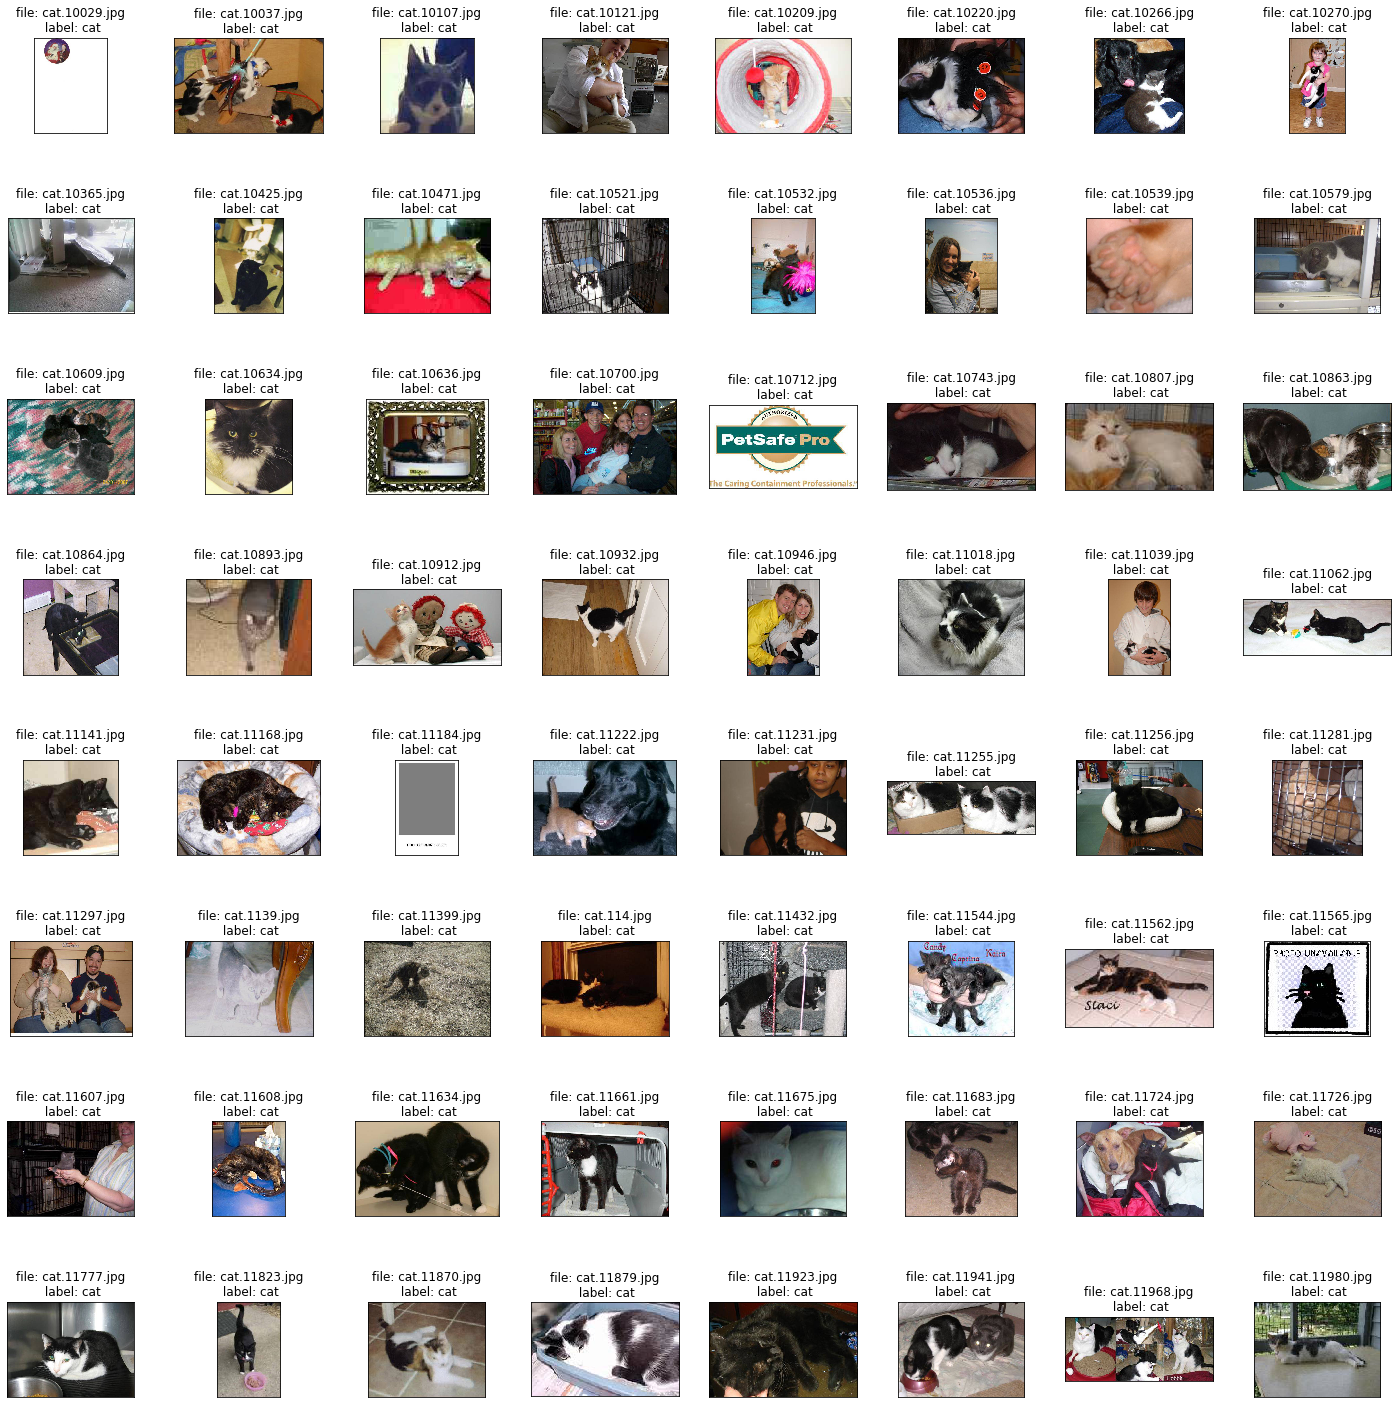

In [23]:
# view of the top 64 abnormal images
view_of_cheat_files(8, 8, 0, 64)

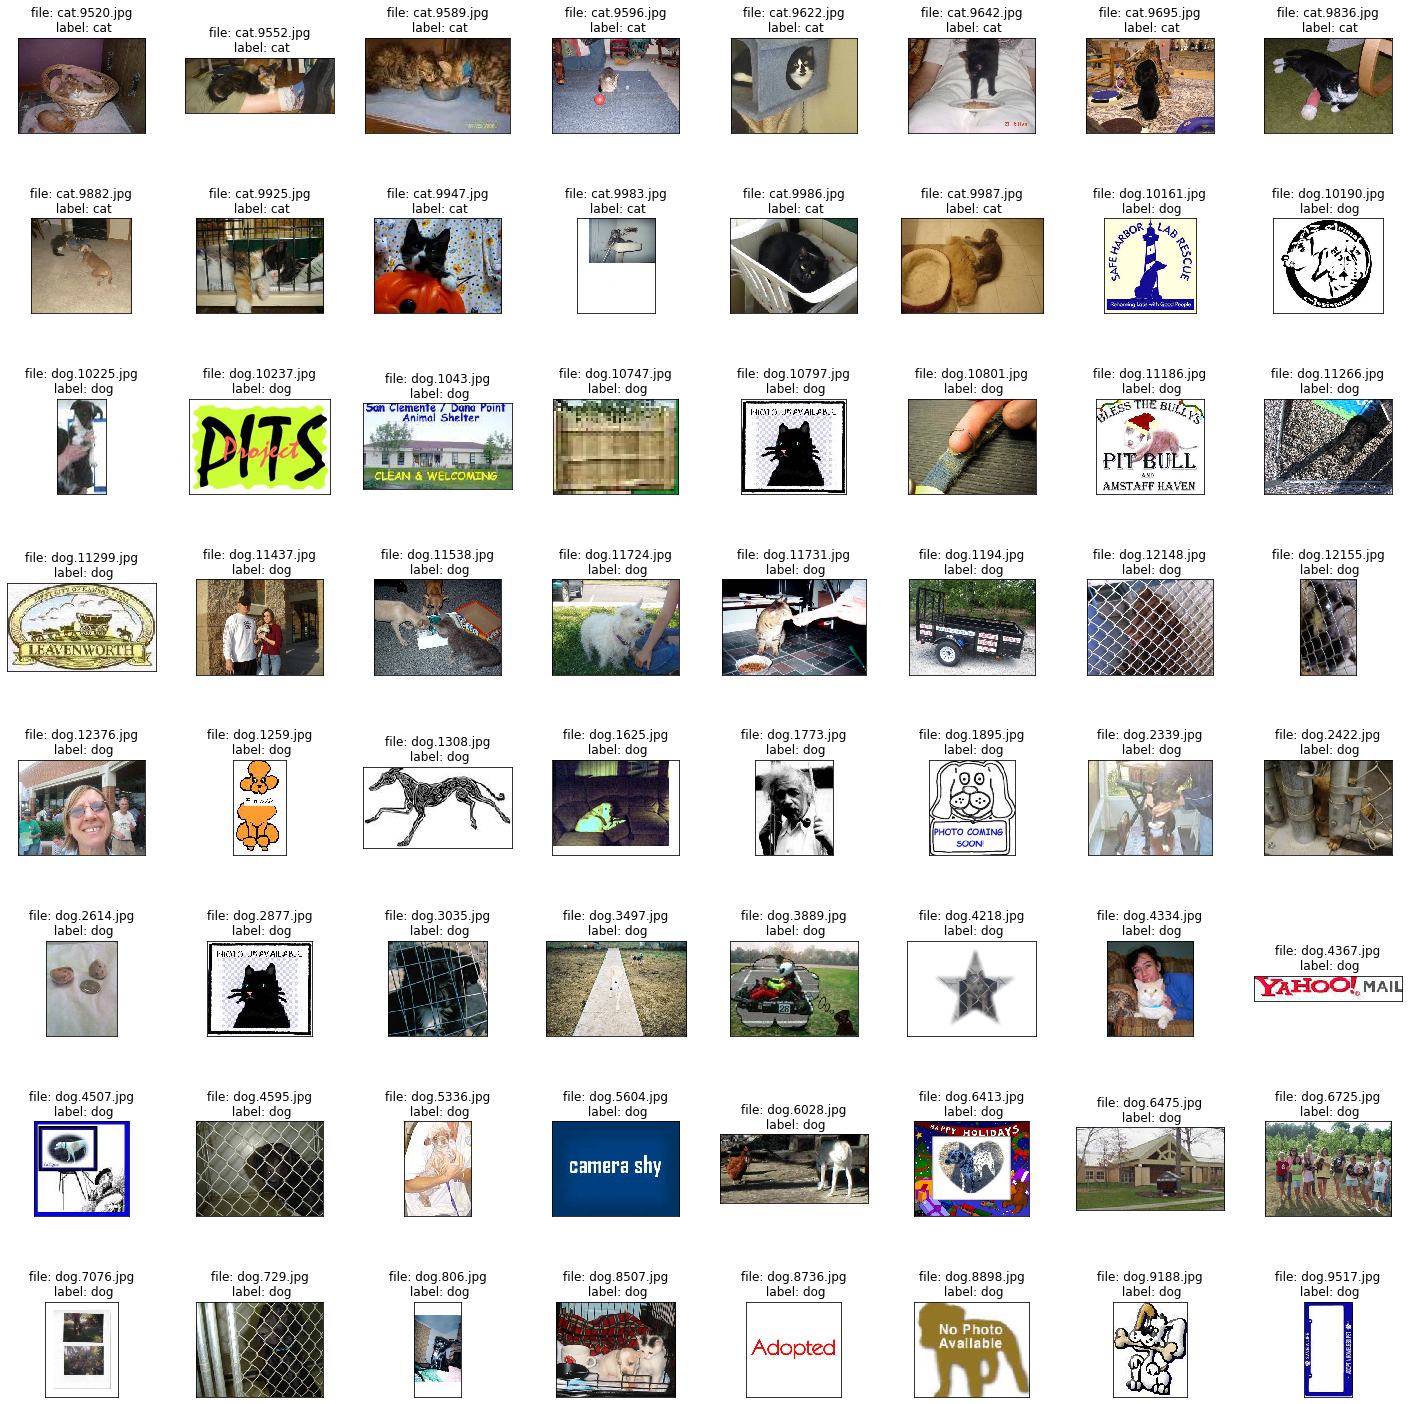

In [24]:
# view of the last 64 abnormal images
view_of_cheat_files(8, 8, -64, 0)

# -----------------------
# Dirty Data Removing
# -----------------------

In [99]:
# Remove above cheat files & bulid a dataframe
for file in cheatfiles_all:
    fnames.remove(file)

df = pd.DataFrame({
    'file': fnames,
    'label': [name.split('.')[0] for name in fnames]
})
df.head()

file label
0   cat.2960.jpg   cat
1  dog.11107.jpg   dog
2   cat.3056.jpg   cat
3  cat.12279.jpg   cat
4   dog.7786.jpg   dog

In [100]:
# Save as csv file
df.to_csv('data_clean.csv', index=False)

# Training Set & Validation Set


In [101]:
df = pd.read_csv('data_clean.csv')
df.head()

file label
0   cat.2960.jpg   cat
1  dog.11107.jpg   dog
2   cat.3056.jpg   cat
3  cat.12279.jpg   cat
4   dog.7786.jpg   dog

In [10]:
from sklearn.model_selection import train_test_split


# Dataframe of training set & validation set
df_trn, df_val = train_test_split(df, stratify=df['label'], random_state=0)
df_trn.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)

In [11]:
def show_images_from_df(data_df, nrows, ncols, directory=FOLDER_TRN, is_train=True, pred_label=None):
    """
        showing images from dataframe.
    """
    
    fig, ax = plt.subplots(nrows, ncols, figsize=(15, 15))
    plt.subplots_adjust(wspace=.4, hspace=.5)
    
    for idx, row in data_df[:nrows*ncols].iterrows():
        fname = row['file']
        prob = pred_label[idx] if not is_train else 1.000
        label = row['label'] if is_train  else ('dog' if prob > 0.500 else 'cat')
        img = plt.imread(os.path.join(directory, fname))
        
        ax[idx // ncols, idx % ncols].imshow(img)
        if is_train:
            ax[idx // ncols, idx % ncols].set_title("file: {}\n label: {}".format(fname, label), size=12)
        else:
            ax[idx // ncols, idx % ncols].set_title("file: {}\n prediction: {}\nprobability:{:.3f}".format(fname, label, prob), size=12)

        ax[idx // ncols, idx % ncols].get_xaxis().set_visible(False)
        ax[idx // ncols, idx % ncols].get_yaxis().set_visible(False)

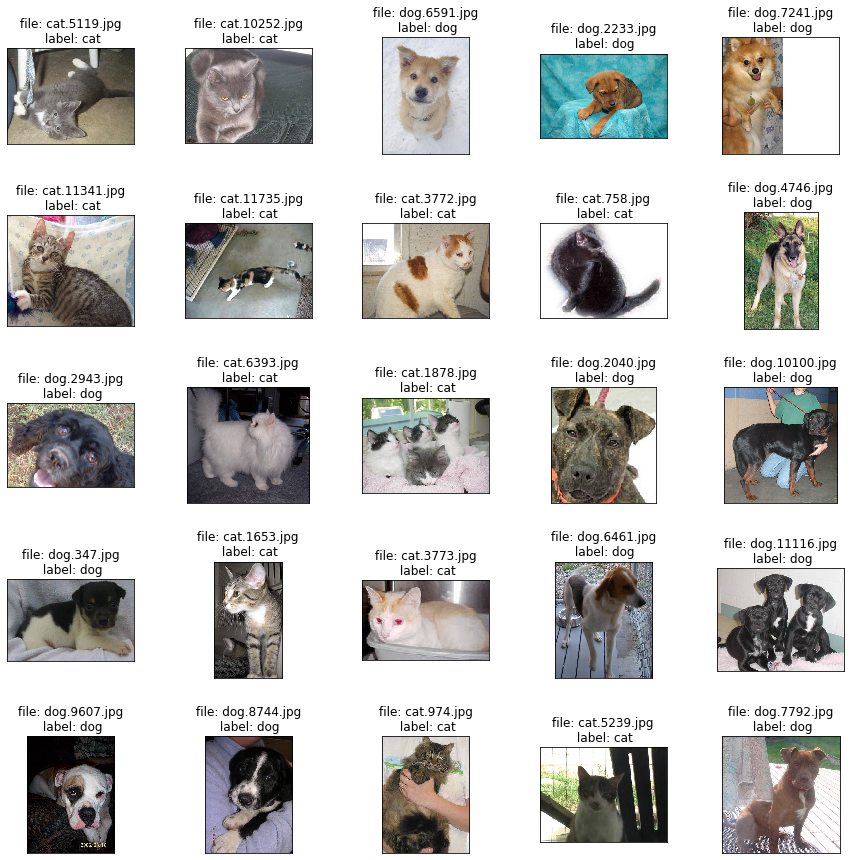

In [30]:
# Show images of training data
show_images_from_df(df_trn, 5, 5)

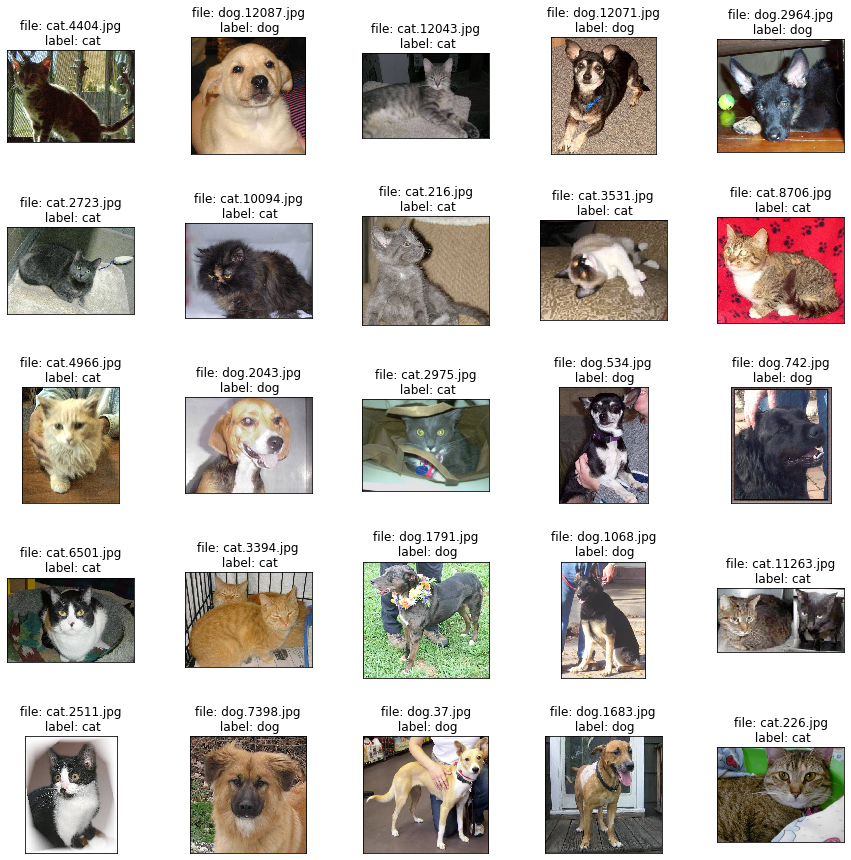

In [31]:
# Show images of validation data
show_images_from_df(df_val, 5, 5)

# Data Augmentation

In [12]:
from keras.preprocessing.image import ImageDataGenerator


# Batch size
BATCH_SIZE_331 = 16
BATCH_SIZE_299 = 32

# Image size
SIZE_299 = (299, 299)
SIZE_331 = (331, 331)

def generator_flow(
    datagen, df, target_size, batch_size,
    directory=FOLDER_TRN, x_col='file', y_col='label',
    mode='binary', shuffle=True
):
    gen = datagen.flow_from_dataframe(
        df, 
        directory=directory, 
        x_col=x_col,
        y_col=y_col, 
        target_size=target_size, 
        class_mode=mode,
        batch_size=batch_size,
        shuffle=shuffle
    )
    return gen

datagen_trn = ImageDataGenerator(
    rotation_range=25,
    
    width_shift_range=.1,
    height_shift_range=.1,
    zoom_range=.2,
    shear_range=.1,
    horizontal_flip=True
)
datagen_val = ImageDataGenerator()

In [13]:
# Data generator of training data & validation data with different size
generator_trn_331 = generator_flow(datagen_trn, df_trn, SIZE_331, BATCH_SIZE_331)
generator_val_331 = generator_flow(datagen_val, df_val, SIZE_331, BATCH_SIZE_331)
generator_trn_299 = generator_flow(datagen_trn, df_trn, SIZE_299, BATCH_SIZE_299)
generator_val_299 = generator_flow(datagen_val, df_val, SIZE_299, BATCH_SIZE_299)

Found 18429 images belonging to 2 classes.
Found 6143 images belonging to 2 classes.
Found 18429 images belonging to 2 classes.
Found 6143 images belonging to 2 classes.


In [83]:
# Class indices
print(generator_trn_331.class_indices)
print(generator_trn_299.class_indices)
print(generator_val_331.class_indices)
print(generator_val_299.class_indices)

{'cat': 0, 'dog': 1}
{'cat': 0, 'dog': 1}
{'cat': 0, 'dog': 1}
{'cat': 0, 'dog': 1}


In [14]:
# define a function for sorting the testing images in their directory by number in image name
import re


def key_func(entry):
    """
        sort files in their directory by number of its name.
    """
    return int(re.search(r'\d+', entry).group())

In [15]:
# Sort testing data
FOLDER_TEST = Path('test/')

fnames_tst = os.listdir(FOLDER_TEST)
fnames_tst.sort(key=key_func)
fnames_tst[:10]

['1.jpg',
 '2.jpg',
 '3.jpg',
 '4.jpg',
 '5.jpg',
 '6.jpg',
 '7.jpg',
 '8.jpg',
 '9.jpg',
 '10.jpg']

In [16]:
# Generator for testing data, set 'shuffle'=False
df_tst = pd.DataFrame({
    'file': fnames_tst
})
datagen_tst = ImageDataGenerator()
generator_tst_331 = generator_flow(datagen_tst, df_tst, (331, 331), 16, directory=FOLDER_TEST, y_col=None, mode=None, shuffle=False)
generator_tst_299 = generator_flow(datagen_tst, df_tst, SIZE_299, BATCH_SIZE_299, directory=FOLDER_TEST, y_col=None, mode=None, shuffle=False)

Found 12500 images.
Found 12500 images.


# ***********************

# Transfer Learning
# Pretrained Xception, InceptionV3, NASNetLarge & InceptionResNetV2
# Model Building

# ***********************

In [17]:
from keras.models import Model
from keras.layers import Input, Lambda


SHAPE_299 = (299, 299, 3)
SHAPE_331 = (331, 331, 3)


def build_pretrained_model(base_model, input_shape, preprocess_func, weight_scheme='imagenet', trainable=False):
    """
        pretrained model, remove top level, preprocess inputs, for extrating features.
    """
    model_input = Input(shape=input_shape) 
    tensor = Lambda(preprocess_func)(model_input)
    pretrained_model = base_model(input_tensor=tensor, weights=weight_scheme, include_top=False, pooling='avg')
    model = Model(model_input, pretrained_model.output)
    model.trainable = trainable
    
    return model

In [18]:
# Build pretrained Xception & InceptionV3 model with input shape (299, 299, 3) 
model_xception = build_pretrained_model(Xception, SHAPE_299, xception.preprocess_input)
model_inceptionv3 = build_pretrained_model(InceptionV3, SHAPE_299, inception_v3.preprocess_input)

# Build pretrained NASNetLarge & InceptionResNetV2 model with input shape (331, 331, 3) 
model_nasnet = build_pretrained_model(NASNetLarge, SHAPE_331, nasnet.preprocess_input)
model_inception_resnet = build_pretrained_model(InceptionResNetV2, SHAPE_331, inception_resnet_v2.preprocess_input)

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
from keras.layers import Concatenate, Dense, Dropout, Flatten, BatchNormalization, Activation


def build_model(pretrained_models, input_shape):
    """
        build model with features extracted by pretained models, for predicting testing data.
    """
    model_input = Input(shape=input_shape)
    extracted_features = [pm(model_input) for pm in pretrained_models]

    x = Concatenate()(extracted_features)
    x = Dropout(rate=.5, name='dropout')(x)
    
    if x.shape[-1] == 4096:
        x = Dense(1024, name='dense1')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Dropout(rate=.5, name='drop1')(x)
        x = Dense(16, name='dense2')(x)
        x = Activation('relu')(x)
        x = Dropout(rate=.3, name='drop2')(x)

    else:
        x = Dense(128, name='dense1')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Dropout(rate=.3, name='drop1')(x)
    
    prob = Dense(1, activation='sigmoid', name='prob')(x)
    model = Model(inputs=model_input, outputs=prob)
    
    return model

In [20]:
# Build model with input shape (299, 299, 3)
model_299 = build_model([model_xception, model_inceptionv3], SHAPE_299)
# Build model with input shape (331, 331, 3)
model_331 = build_model([model_nasnet, model_inception_resnet], SHAPE_331)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [80]:
# Summary of Model with input shape (299, 299, 3)
model_299.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
model_8 (Model)                 (None, 2048)         20861480    input_10[0][0]                   
__________________________________________________________________________________________________
model_9 (Model)                 (None, 2048)         21802784    input_10[0][0]                   
__________________________________________________________________________________________________
concatenate_10 (Concatenate)    (None, 4096)         0           model_8[1][0]                    
                                                                 model_9[1][0]                    
__________

In [68]:
# Summary of Model with input shape (224, 224, 3)
model_331.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 331, 331, 3)  0                                            
__________________________________________________________________________________________________
model_1 (Model)                 (None, 4032)         84916818    input_8[0][0]                    
__________________________________________________________________________________________________
model_2 (Model)                 (None, 1536)         54336736    input_8[0][0]                    
__________________________________________________________________________________________________
concatenate_12 (Concatenate)    (None, 5568)         0           model_1[4][0]                    
                                                                 model_2[4][0]                    
__________

# Model Visualization

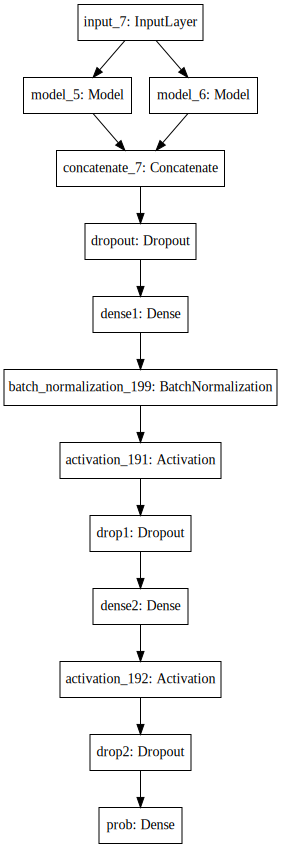

In [41]:
# Show the model graphical representation
from IPython.display import SVG
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot


GRAPHFILE='model299.png'
plot_model(model_299, to_file=GRAPHFILE)
SVG(model_to_dot(model_299).create(prog='dot', format='svg'))

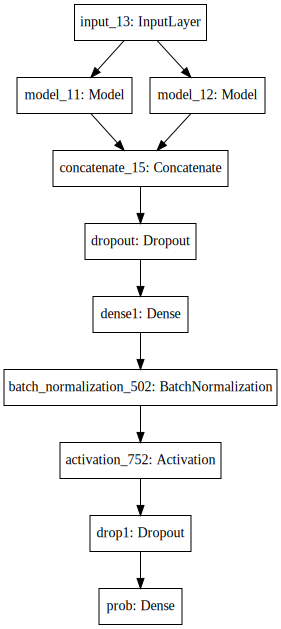

In [86]:
GRAPHFILE='model331.png'
plot_model(model_331, to_file=GRAPHFILE)
SVG(model_to_dot(model_331).create(prog='dot', format='svg'))

# Model training

In [21]:
from keras.optimizers import SGD


# Model compiling
model_299.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='rmsprop')
model_331.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=SGD(lr=9e-3, momentum=.9, decay=1e-4, nesterov=True))

In [22]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

import gc


# Traininig epochs
EPOCHS = 10

# Files storing model best weights
WEIGHTFILE299 = 'model299.weights.best.hdf5'
WEIGHTFILE331 = 'model331.weights.best.hdf5'

# Model check point
ckp299 = ModelCheckpoint(
    filepath=WEIGHTFILE299,
    save_best_only=True,
    verbose=1
)

ckp331 = ModelCheckpoint(
    filepath=WEIGHTFILE331,
    save_best_only=True,
    verbose=1
)

# Early stopping
es = EarlyStopping(patience=3, verbose=1)

In [59]:
# Garbage collection
gc.collect()

# Model traininig with image input shape=(299, 299, 3)
history_299 = model_299.fit_generator(
    generator_trn_299, 
    steps_per_epoch=len(df_trn) // BATCH_SIZE_299,
    epochs=EPOCHS,
    callbacks=[ckp299, es],
    validation_data=generator_val_299,
    validation_steps=len(df_val) // BATCH_SIZE_299,
    verbose=1
)

Epoch 1/10
575/575 [==============================] - 700s 1s/step - loss: 0.1087 - acc: 0.9682 - val_loss: 0.0674 - val_acc: 0.9910

Epoch 00001: val_loss improved from inf to 0.06740, saving model to model299.0823.1218.weights.best.hdf5
Epoch 2/10
575/575 [==============================] - 673s 1s/step - loss: 0.0840 - acc: 0.9773 - val_loss: 0.0154 - val_acc: 0.9974

Epoch 00002: val_loss improved from 0.06740 to 0.01544, saving model to model299.0823.1218.weights.best.hdf5
Epoch 3/10
575/575 [==============================] - 674s 1s/step - loss: 0.0736 - acc: 0.9793 - val_loss: 0.0225 - val_acc: 0.9967

Epoch 00003: val_loss did not improve from 0.01544
Epoch 4/10
575/575 [==============================] - 674s 1s/step - loss: 0.0742 - acc: 0.9808 - val_loss: 0.0395 - val_acc: 0.9943

Epoch 00004: val_loss did not improve from 0.01544
Epoch 5/10
575/575 [==============================] - 674s 1s/step - loss: 0.0709 - acc: 0.9812 - val_loss: 0.0113 - val_acc: 0.9977

Epoch 00005: v

In [61]:
# Load the best weight gained from traninig
model_299.load_weights(WEIGHTFILE299)

In [24]:
# Garbage collection
gc.collect()

# Model traininig with image input shape=(331, 331, 3)
history_331 = model_331.fit_generator(
    generator_trn_331, 
    steps_per_epoch=len(df_trn) // BATCH_SIZE_331,
    epochs=EPOCHS,
    callbacks=[ckp331, es],
    validation_data=generator_val_331,
    validation_steps=len(df_val) // BATCH_SIZE_331,
    verbose=1
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
1151/1151 [==============================] - 2624s 2s/step - loss: 0.0429 - acc: 0.9851 - val_loss: 0.0222 - val_acc: 0.9930

Epoch 00001: val_loss improved from inf to 0.02225, saving model to model331.weights.best.hdf5
Epoch 2/10
1151/1151 [==============================] - 2585s 2s/step - loss: 0.0409 - acc: 0.9848 - val_loss: 0.0191 - val_acc: 0.9936

Epoch 00002: val_loss improved from 0.02225 to 0.01910, saving model to model331.weights.best.hdf5
Epoch 3/10
1151/1151 [==============================] - 2582s 2s/step - loss: 0.0377 - acc: 0.9854 - val_loss: 0.0208 - val_acc: 0.9938

Epoch 00003: val_loss did not improve from 0.01910
Epoch 4/10
1151/1151 [==============================] - 2580s 2s/step - loss: 0.0359 - acc: 0.9862 - val_loss: 0.0227 - val_acc: 0.9925

Epoch 00004: val_loss did not improve from 0.01910
Epoch 5/10
1151/1151 [==============================] - 2581s 2s/step - loss: 0.0399 - acc: 0.9861 - val_los

In [25]:
# Load the best weight gained from traninig
model_331.load_weights(WEIGHTFILE331)

# Training History Visualization

In [26]:
# Visualization of accuracy&loss for training step&validation step
def view_acc_and_loss(his):
    fig, axes = plt.subplots(1, 2, figsize=(18,5))

    for i, c in enumerate(['acc', 'loss']):
        axes[i].plot(his[c], label=f'Training {c}')
        axes[i].plot(his[f'val_{c}'], label=f'Validation {c}')
        axes[i].set_xlabel('epoch')
        axes[i].set_ylabel(c);
        axes[i].legend()
        axes[i].set_title(f'Training and Validation {c}')
        plt.grid()
    
    plt.show()

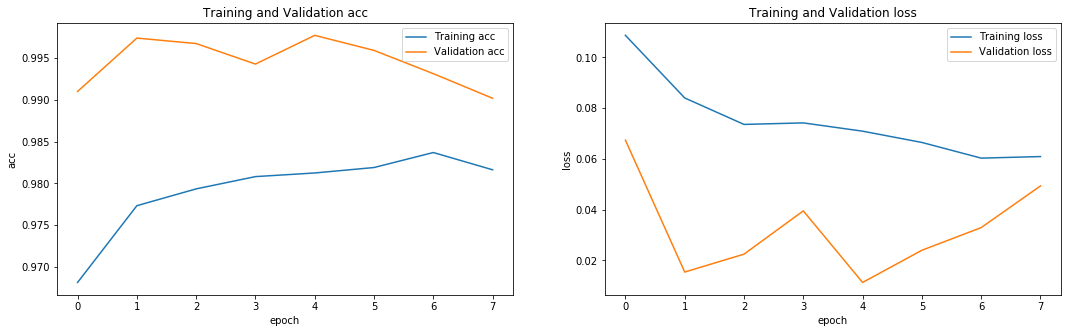

In [60]:
# Plotting loss and accuracy for model_299
view_acc_and_loss(history_299.history)

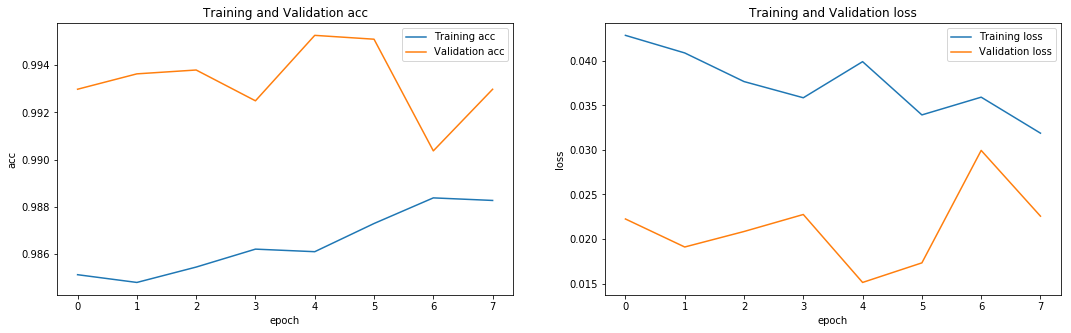

In [27]:
# Plotting loss and accuracy for model_331(SGD with lr=9e-3)
view_acc_and_loss(history_331.history)

# Model Prediction

In [78]:
# Model_299 prediction
pred_299 = model_299.predict_generator(generator_tst_299, steps=np.ceil(len(df_tst) / BATCH_SIZE_299))
# Clip into range (0.005, 0.995), and reduce to 1 dimension
prob_299 = pred_299.clip(min=0.005, max=0.995).ravel()

In [28]:
# Model_331 prediction
pred_331 = model_331.predict_generator(generator_tst_331, steps=np.ceil(len(df_tst) / BATCH_SIZE_331))
# Clip into range (0.005, 0.995), and reduce to 1 dimension
prob_331 = pred_331.clip(min=0.005, max=0.995).ravel()

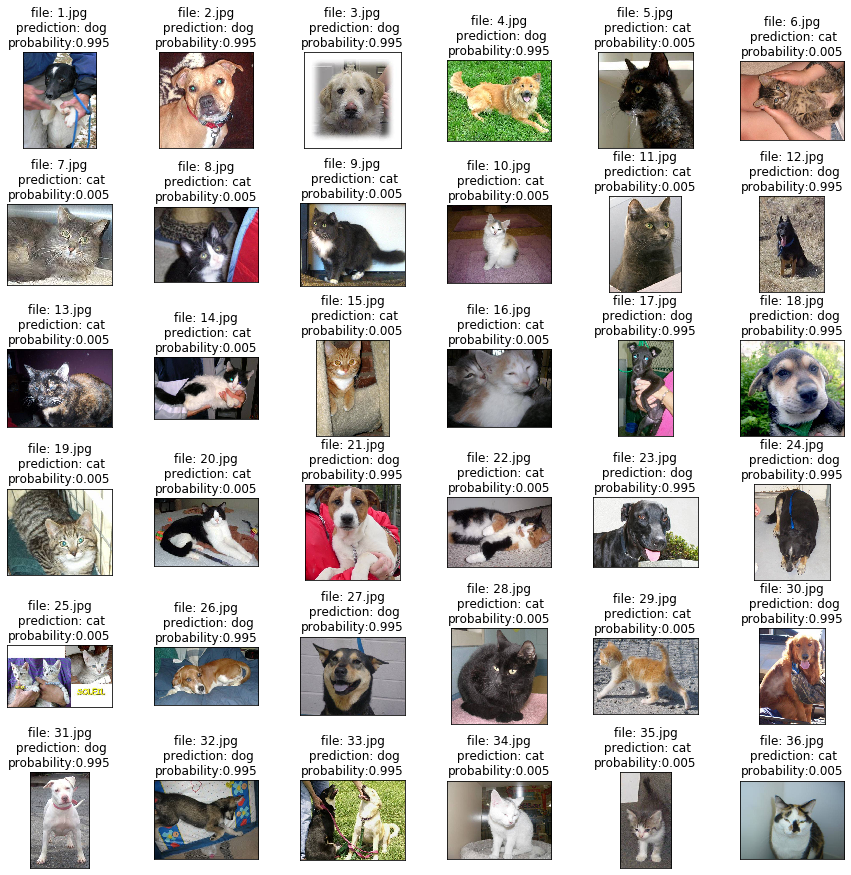

In [65]:
# Performance on testing set by model_299
show_images_from_df(df_tst, 6, 6, directory='test/', is_train=False, pred_label=prob_299)

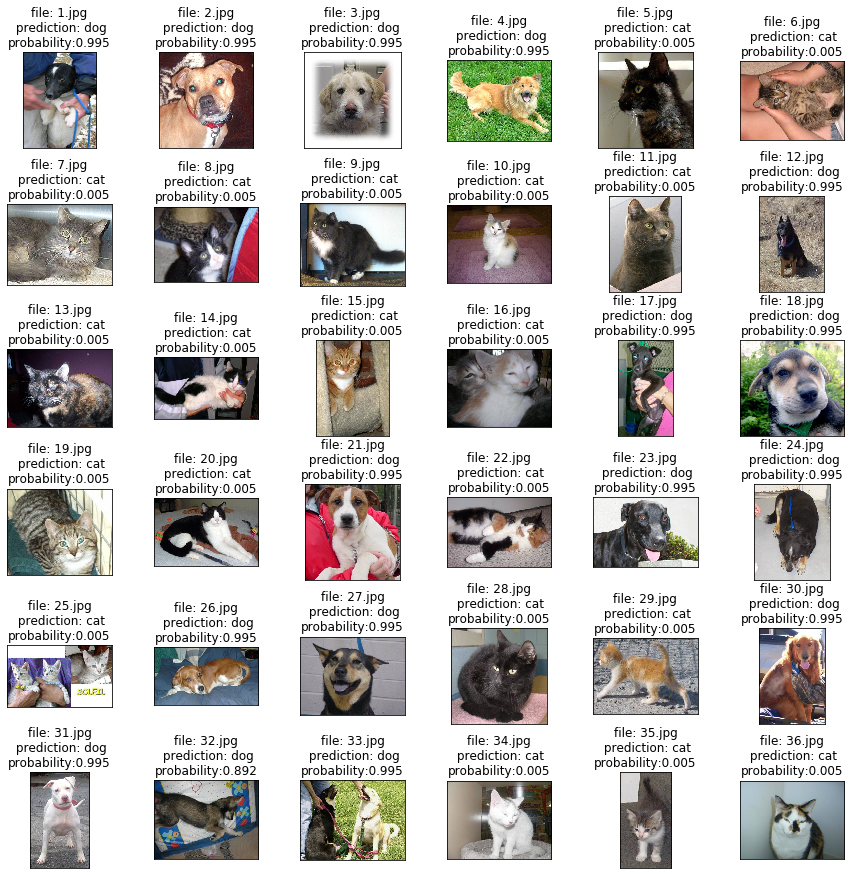

In [29]:
# Performance on testing set by model_331
show_images_from_df(df_tst, 6, 6, directory=FOLDER_TEST, is_train=False, pred_label=prob_331)

# Final Result

In [79]:
# Generate submission file for model_299
submission_df = pd.read_csv('sample_submission.csv')
for idx, fname in enumerate(fnames_tst):
    idx_df = int(fname.split('.')[0]) - 1
    submission_df.at[idx_df, 'label'] = prob_299[idx]

SUBMITFILE_299 = 'submission_299.csv'
submission_df.to_csv(SUBMITFILE_299, index=False)
submission_df.head()

id  label
0   1  0.995
1   2  0.995
2   3  0.995
3   4  0.995
4   5  0.005

In [30]:
# Generate submission file fof model_331
submission_df = pd.read_csv('sample_submission.csv')
for idx, fname in enumerate(fnames_tst):
    idx_df = int(fname.split('.')[0]) - 1
    submission_df.at[idx_df, 'label'] = prob_331[idx]

SUBMITFILE_331= 'submission_331.csv'
submission_df.to_csv(SUBMITFILE_331, index=False)
submission_df.head()

id  label
0   1  0.995
1   2  0.995
2   3  0.995
3   4  0.995
4   5  0.005

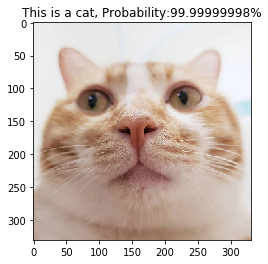

In [51]:
img_path = 'lijiahe.jpg'
img = image.load_img(img_path, target_size=SIZE_331)
arr = image.img_to_array(img)
tensor = np.expand_dims(arr, axis=0)
preds = model.predict(tensor)
preds = preds.ravel()[0]

plt.imshow(img)
if preds < 0.500:
    plt.title("This is a {}, Probability:{:.8f}%".format('cat', (1-preds) * 100), size=12)
else:
    plt.title("This is a {}, Probability:{:.8f}%".format('dog', (1-preds) * 100), size=12)